# 语音业务

In [1]:
import numpy as np
import pandas as pd

In [2]:
data_raw = pd.read_excel("附件1语音业务用户满意度数据.xlsx").set_index("用户id")

### Clean Up

In [80]:
data = data_raw.copy()
data

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,是否实名登记用户,客户星级标识,当月欠费金额,前第3个月欠费金额
用户id,,,,,,,,,,,,,,,,,,,,,
1,10,6,6,6,1,-1,2,-1,-1,-1,...,0.0,480,1.0,8450801,8450801,是,否,银卡,0.0,0.00
2,2,1,1,1,1,1,2,-1,4,-1,...,0.0,480,1.0,17425910,17425910,是,是,银卡,0.0,0.00
3,10,7,7,7,1,-1,-1,-1,-1,-1,...,0.0,413,1.0,6215849,6215849,否,否,三星,0.0,3.76
4,6,7,7,6,1,1,2,-1,-1,-1,...,0.0,301,1.0,5370710,5370710,是,否,三星,0.0,0.00
5,5,5,4,3,1,-1,2,-1,-1,5,...,0.0,1193,1.0,3857521,3857521,否,否,银卡,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,10,10,10,8,1,-1,2,-1,-1,-1,...,0.0,320,0.0,16654303,0,否,否,二星,0.0,0.00
5430,10,10,10,10,1,1,2,-1,-1,-1,...,0.0,147,0.0,627901,0,是,否,三星,0.0,0.00
5431,6,5,7,4,1,-1,-1,-1,4,-1,...,0.0,150,0.0,6816663,0,否,否,银卡,0.0,0.00


In [81]:
drop = ["其他，请注明","用户描述.1", "用户描述", "重定向次数","重定向驻留时长"]

data = data.drop(drop, axis=1)
#rows_with_nan = data[data.isna().any(axis=1)]
#rows_with_nan

In [87]:
fill = ["是否关怀用户", "是否去过营业厅"]
data[fill] = data[fill].fillna("否")
data = data.fillna(0)

data[data.isna().any(axis=1)]

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,是否实名登记用户,客户星级标识,当月欠费金额,前第3个月欠费金额
用户id,,,,,,,,,,,,,,,,,,,,,


In [83]:
# Binary Conversion

bool_1 = ["居民小区","办公室","高校","商业街","地铁"]
bool_2 = ["手机没有信号","有信号无法拨通","通话过程中突然中断","通话中有杂音、听不清、断断续续","串线","通话过程中一方听不见"]
bool_3 = ["脱网次数","mos质差次数","未接通掉话次数"]
bool_4 = ["是否关怀用户", "是否去过营业厅", "是否5G网络客户","是否实名登记用户", "是否4G网络客户（本地剔除物联网）"]

def binary(df, tar):
    df[tar] = df[tar].apply(pd.to_numeric, errors='coerce')<=0
    return df

def binary_ch(df, tar):
    df[tar] = df[tar]=="是"
    return df

data = binary(data, bool_1)
data = binary(data, bool_2)
data = binary(data, bool_3)

data = binary_ch(data, bool_4)

data.head()

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,是否实名登记用户,客户星级标识,当月欠费金额,前第3个月欠费金额
用户id,,,,,,,,,,,,,,,,,,,,,
1,10,6,6,6,1,True,False,True,True,True,...,0.0,480,1.0,8450801,8450801,True,False,银卡,0.0,0.00
2,2,1,1,1,1,False,False,True,False,True,...,0.0,480,1.0,17425910,17425910,True,True,银卡,0.0,0.00
3,10,7,7,7,1,True,True,True,True,True,...,0.0,413,1.0,6215849,6215849,False,False,三星,0.0,3.76
4,6,7,7,6,1,False,False,True,True,True,...,0.0,301,1.0,5370710,5370710,True,False,三星,0.0,0.00
5,5,5,4,3,1,True,False,True,True,False,...,0.0,1193,1.0,3857521,3857521,False,False,银卡,0.0,0.00


In [84]:
# Class Conversion

class_1 = [r"4\5G用户", "是否5G网络客户", "语音方式", "终端品牌"]
class_2 = ["是否实名登记用户","客户星级标识"]

def classif(df, tar):
    for cls in tar:
        df[cls],_ = pd.factorize(df[cls])
        
    return df

data = classif(data, class_1)
data = classif(data, class_2)

In [119]:
# Normalization

norm = ["语音通话-时长（分钟）","省际漫游-时长（分钟）","当月ARPU","当月MOU","前3月ARPU","前3月MOU","外省流量占比","GPRS总流量（KB）","GPRS-国内漫游-流量（KB）","当月欠费金额","前第3个月欠费金额"]

def normali(data, col):
    data[col] = (data[col]-data[col].mean())/data[col].std()
    return data

data = normali(data, norm)
data = normali(data, ["是否遇到过网络问题"]+bool_1+bool_2+bool_3+bool_4)
data = normali(data, class_1+class_2)

norm_total = norm+["是否遇到过网络问题"]+bool_1+bool_2+bool_3+bool_4+class_1+class_2

In [120]:
data.head().loc[1]

语音通话整体满意度                  10
网络覆盖与信号强度                   6
语音通话清晰度                     6
语音通话稳定性                     6
是否遇到过网络问题           -0.948412
居民小区                 0.716433
办公室                 -1.969946
高校                   0.148341
商业街                  0.296828
地铁                   0.535517
农村                         -1
高铁                         -1
手机没有信号               0.601322
有信号无法拨通             -2.167967
通话过程中突然中断            0.590829
通话中有杂音、听不清、断断续续     -1.527987
串线                   0.202476
通话过程中一方听不见           0.603308
其他，请注明.1                   -1
脱网次数                 0.606714
mos质差次数              1.445096
未接通掉话次数              0.651755
家宽投诉                        0
资费投诉                        0
4\5G用户              -1.250628
语音方式                 -1.17321
是否关怀用户              -0.195479
是否去过营业厅              1.098417
ARPU（家庭宽带）                0.0
套外流量（MB）              1816.45
是否4G网络客户（本地剔除物联网）    0.085023
套外流量费（元）                250.0
外省语音占比                    1.0
语音通话-时长（分钟

In [90]:
int_score = ["语音通话整体满意度","网络覆盖与信号强度","语音通话清晰度","语音通话稳定性"]

data[int_score] = data[int_score].apply(pd.to_numeric, errors='coerce')

In [91]:
score = data[int_score]
score = score.values.T
score

array([[10,  2, 10, ...,  6,  9, 10],
       [ 6,  1,  7, ...,  5,  9, 10],
       [ 6,  1,  7, ...,  7, 10, 10],
       [ 6,  1,  7, ...,  4,  9, 10]], dtype=int64)

## 打分线性回归

In [92]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [93]:
model.fit(score[1:].T, score[0])

LinearRegression()

### 拟合结果

In [302]:
import seaborn as sns  
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["font.sans-serif"]=["SimHei"]#展示中文字体
mpl.rcParams["axes.unicode_minus"]=False#处理负刻度值

help(sns.set_style)

Help on function set_style in module seaborn.rcmod:

set_style(style=None, rc=None)
    Set the parameters that control the general style of the plots.
    
    The style parameters control properties like the color of the background and
    whether a grid is enabled by default. This is accomplished using the
    matplotlib rcParams system.
    
    The options are illustrated in the
    :doc:`aesthetics tutorial <../tutorial/aesthetics>`.
    
    See :func:`axes_style` to get the parameter values.
    
    Parameters
    ----------
    style : dict, or one of {darkgrid, whitegrid, dark, white, ticks}
        A dictionary of parameters or the name of a preconfigured style.
    rc : dict, optional
        Parameter mappings to override the values in the preset seaborn
        style dictionaries. This only updates parameters that are
        considered part of the style definition.
    
    Examples
    --------
    
    .. include:: ../docstrings/set_style.rst



[0.29897125 0.44369613 0.19968409]
0.6732004276680339


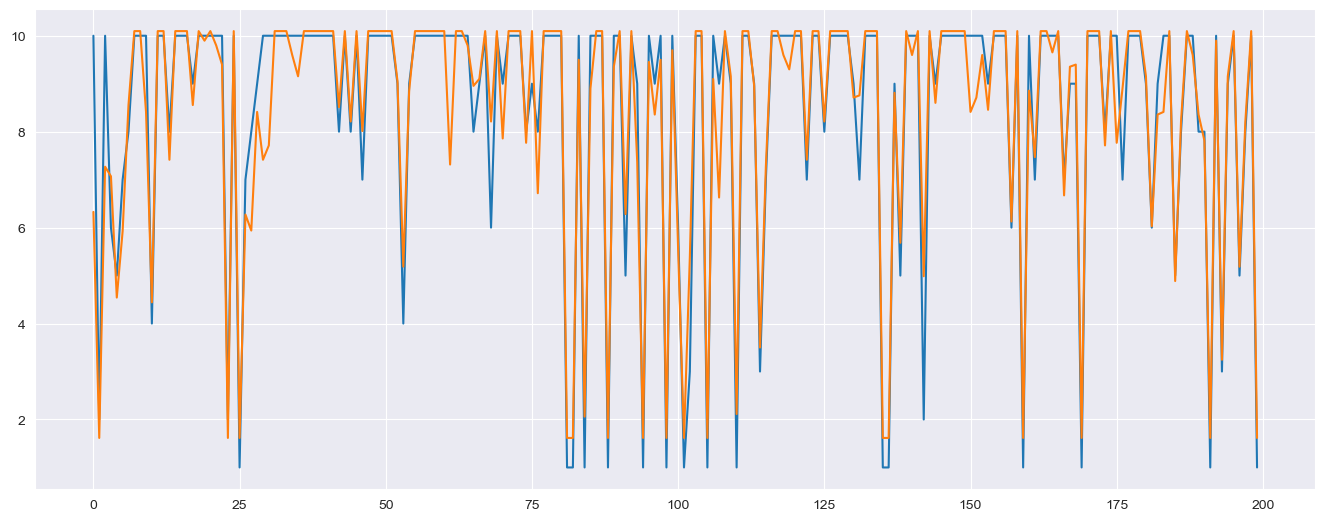

In [112]:
plt.plot(score[0, :200])

score_pred = model.predict(score[1:].T)
plt.plot(score_pred[:200])

plt.subplots_adjust(left=0, right=2, bottom = 0, top= 1)

print(model.coef_)
print(model.intercept_)

## 随机森林打分逐项分析

In [113]:
data_size = len(data)
train_size = int(data_size*0.8)
test_size = data_size - train_size

data_train = data[:train_size]
data_test = data[train_size:]

score_train = score[:,:train_size]
score_test = score[:,train_size:]

In [116]:
print(score_train.shape)
print(data_train.shape)

(4, 4346)
(4346, 49)


In [187]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

In [261]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

clari = bool_1+bool_2+class_1

train_d = data_train[clari].values

rf_classifier.fit(train_d, score_train[1])

RandomForestClassifier(random_state=42)

2.4684548211207873
2.1868956284534478


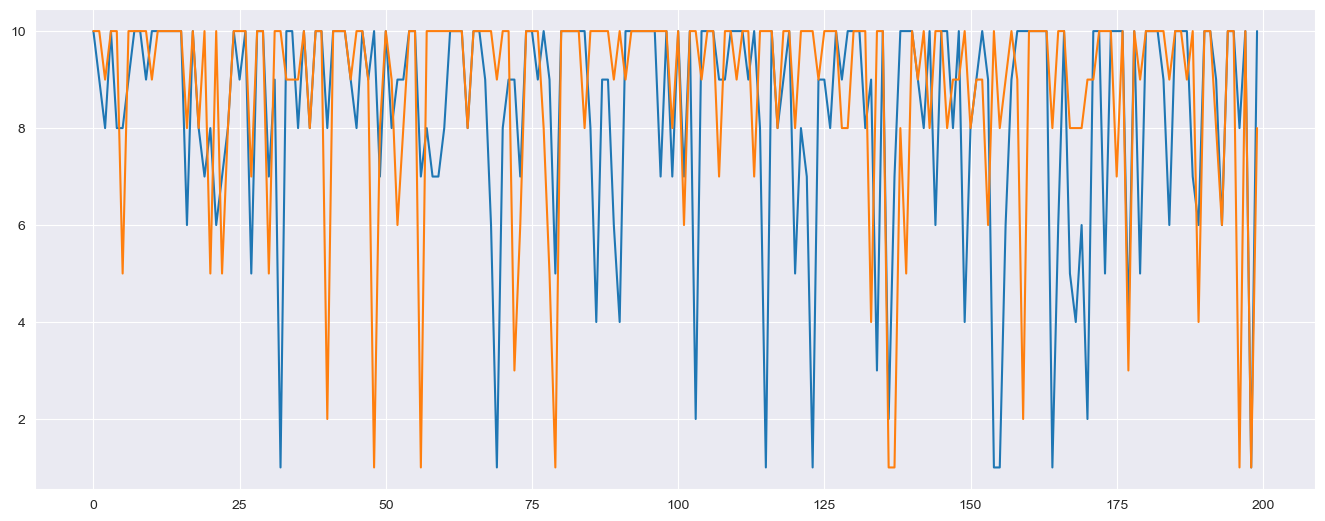

In [262]:
test_d = data_test[clari].values
y_pred = rf_classifier.predict(test_d)

plt.plot(score_test[1, :200])
plt.plot(np.round(y_pred[:200]))
plt.subplots_adjust(left=0, right=2, bottom = 0, top= 1)
print((score_test-y_pred).std())
print((score_test).std())

## 重要性分析

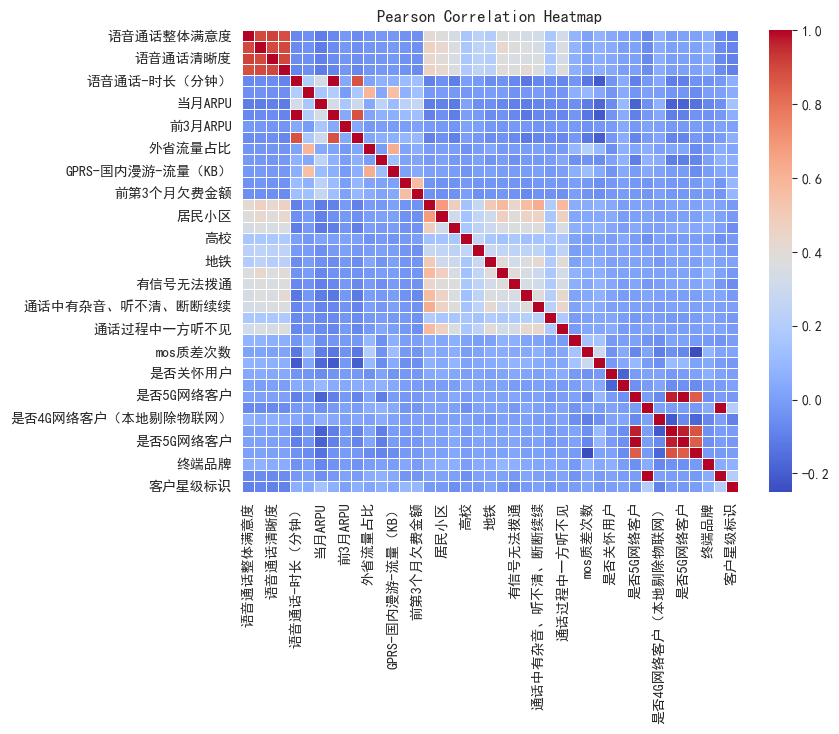

In [322]:
correlation_matrix = data[int_score+norm_total].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Pearson Correlation Heatmap")
plt.show()

In [311]:
def ranking(score, data, r):
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    
    rf_classifier.fit(data[r].values, score)

    rank = pd.DataFrame(abs(rf_classifier.feature_importances_), r)
    return rank.sort_values(by=0,ascending=False)

general = ranking(score_train[0], data_train, norm_total)
signal = ranking(score_train[1], data_train, norm_total)
clarity = ranking(score_train[2], data_train, norm_total)
stabil = ranking(score_train[3], data_train, norm_total)


In [318]:
general.columns=["整体"]
general

,整体
GPRS总流量（KB）,0.098836
前3月MOU,0.095711
当月ARPU,0.095491
当月MOU,0.092065
语音通话-时长（分钟）,0.089385
终端品牌,0.039955
客户星级标识,0.034843
是否遇到过网络问题,0.031503
通话中有杂音、听不清、断断续续,0.027532
居民小区,0.025186


In [319]:
signal.columns=["信号"]
signal

,信号
GPRS总流量（KB）,0.099040
前3月MOU,0.097606
当月ARPU,0.092350
语音通话-时长（分钟）,0.089874
当月MOU,0.089775
终端品牌,0.039311
是否遇到过网络问题,0.039149
客户星级标识,0.034197
居民小区,0.029927
通话中有杂音、听不清、断断续续,0.024995


In [320]:
clarity.columns=["清晰度"]
clarity

,清晰度
GPRS总流量（KB）,0.100578
当月ARPU,0.095480
前3月MOU,0.095349
当月MOU,0.089239
语音通话-时长（分钟）,0.089180
终端品牌,0.041636
是否遇到过网络问题,0.034119
客户星级标识,0.033735
居民小区,0.027759
通话中有杂音、听不清、断断续续,0.026546


In [321]:
stabil.columns=["稳定性"]
stabil

,稳定性
GPRS总流量（KB）,0.097625
前3月MOU,0.094889
当月ARPU,0.093114
语音通话-时长（分钟）,0.088868
当月MOU,0.088260
终端品牌,0.040394
是否遇到过网络问题,0.036188
客户星级标识,0.033360
居民小区,0.032396
通话过程中一方听不见,0.025778


In [248]:
top10 = rank.sort_values(by=0, ascending=False)[:10].index.values
top10

array(['GPRS总流量（KB）', '前3月MOU', '当月ARPU', '语音通话-时长（分钟）', '当月MOU',
       '是否遇到过网络问题', '终端品牌', '客户星级标识', '居民小区', '通话中有杂音、听不清、断断续续'],
      dtype=object)

In [258]:
top10_classifier = LinearRegression()

train_d = data_train[top10].values

top10_classifier.fit(train_d, score_train[1])

LinearRegression()

1.998131379381747
2.1868956284534478


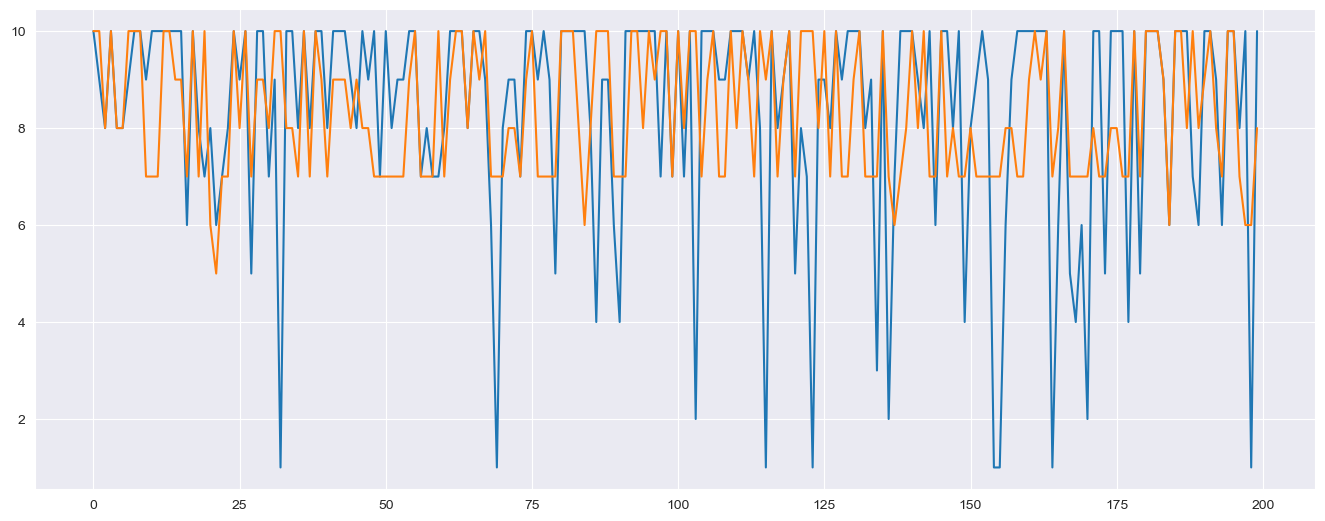

In [259]:
test_d = data_test[top10].values
y_pred = top10_classifier.predict(test_d)

plt.plot(score_test[1, :200])
plt.plot(np.round(y_pred[:200]))
plt.subplots_adjust(left=0, right=2, bottom = 0, top= 1)
print((score_test-y_pred).std())
print((score_test).std())